In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("traffic.csv")

In [5]:
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [6]:
data.size

192480

In [7]:
data.shape

(48120, 4)

In [8]:
data.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
data.drop('ID',axis=1,inplace=True) # The values for ID is not needed

In [11]:
data

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


In [12]:
convert_dict = {'Junction': float}
# Here using astype will return a new dataframe where Junction data have been changed to float
data = data.astype(convert_dict)

In [13]:
X=data.values
Y=data.iloc[38496:48120,0:3].values

In [14]:
data_train=pd.DataFrame(X, columns = ['DateTime','Junction','Vehicles'])

In [15]:
data_test=pd.DataFrame(Y, columns = ['DateTime','Junction','Vehicles'])

# Lag Features
Lag features are values at prior timesteps that are considered useful because they are made keeping in mind the assumption that what happened in the past can influence or contain a sort of intrinsic information about the future.

In [16]:
data_train.head(5)

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1.0,15
1,2015-11-01 01:00:00,1.0,13
2,2015-11-01 02:00:00,1.0,10
3,2015-11-01 03:00:00,1.0,7
4,2015-11-01 04:00:00,1.0,9


In [17]:
# Here pivot method is used to reshape the dataframe organized by Junction Number
train = data_train.pivot(index='DateTime',columns='Junction',values='Vehicles')
train.head(5)

<ipython-input-17-4f8aeadf890d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  train = data_train.pivot(index='DateTime',columns='Junction',values='Vehicles')


Junction,1.0,2.0,3.0,4.0
DateTime,,,,
2015-11-01 00:00:00,15,6,9,NaN
2015-11-01 01:00:00,13,6,7,NaN
2015-11-01 02:00:00,10,5,5,NaN
2015-11-01 03:00:00,7,6,1,NaN
2015-11-01 04:00:00,9,7,2,NaN


In [18]:
train= train.fillna(0)

In [19]:
def gen_lag_features(data1,n_in=1,n_out=1,dropnan=True):
    n_vars=data1.shape[1]
    cols,names=list(),list()
    # input sequence (t-n,...t-1)
    for i in range(n_in,0,-1):
        cols.append(data1.shift(i))
        names+=[('Junction %d (H-%d)'%(j+1,i)) for j in range(n_vars)]
    # forecast sequence (t,t+1...t+n)
    for i in range(0,n_out):
        cols.append(data1.shift(-i))
        if i== 0:
            names+=[('Junction %d (H)' % (j+1)) for j in range(n_vars)]
        else:
            names+=[('Junction %d (H+%d)' % (j+1,i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols,axis=1)
    agg.columns=names
    # drop rows with Nan values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [20]:
Xy_train=gen_lag_features(train)
Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,15.0,6.0,9.0,0.0,13,6,7,0
2015-11-01 02:00:00,13.0,6.0,7.0,0.0,10,5,5,0
2015-11-01 03:00:00,10.0,5.0,5.0,0.0,7,6,1,0
2015-11-01 04:00:00,7.0,6.0,1.0,0.0,9,7,2,0
2015-11-01 05:00:00,9.0,7.0,2.0,0.0,6,2,2,0
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,95.0,34.0,38.0,17.0,105,34,33,11
2017-06-30 20:00:00,105.0,34.0,33.0,11.0,96,35,31,30
2017-06-30 21:00:00,96.0,35.0,31.0,30.0,90,31,28,16


# MinMaxScaler - This package helps in shrinking the data within the given range

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
Xy_train[Xy_train.columns] = scaler.fit_transform(Xy_train[Xy_train.columns])
Xy_train
# All data have been converted within the range of [0,1]

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,0.000000,0.052980,0.106383,0.033520,0.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,0.000000,0.033113,0.085106,0.022346,0.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,0.000000,0.013245,0.106383,0.000000,0.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,0.000000,0.026490,0.127660,0.005587,0.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,0.000000,0.006623,0.021277,0.005587,0.000000
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.472222,0.662252,0.702128,0.178771,0.305556
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.305556,0.602649,0.723404,0.167598,0.833333
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.833333,0.562914,0.638298,0.150838,0.444444


In [22]:
X_train = Xy_train[Xy_train.index< '2017-02-01'].iloc[:,0:4]
X_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,0.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,0.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,0.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,0.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,0.000000
...,...,...,...,...
2017-01-31 19:00:00,0.529801,0.361702,0.078212,0.250000
2017-01-31 20:00:00,0.556291,0.340426,0.072626,0.250000
2017-01-31 21:00:00,0.576159,0.595745,0.089385,0.222222


In [23]:
y_train = Xy_train[Xy_train.index< '2017-02-01'].iloc[:,4:]
y_train

,Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,
2015-11-01 01:00:00,0.052980,0.106383,0.033520,0.000000
2015-11-01 02:00:00,0.033113,0.085106,0.022346,0.000000
2015-11-01 03:00:00,0.013245,0.106383,0.000000,0.000000
2015-11-01 04:00:00,0.026490,0.127660,0.005587,0.000000
2015-11-01 05:00:00,0.006623,0.021277,0.005587,0.000000
...,...,...,...,...
2017-01-31 19:00:00,0.556291,0.340426,0.072626,0.250000
2017-01-31 20:00:00,0.576159,0.595745,0.089385,0.222222
2017-01-31 21:00:00,0.556291,0.489362,0.083799,0.250000


In [24]:
X_train=X_train.values
print(X_train.shape)

y_train=y_train.values
print(y_train.shape)

(10991, 4)
(10991, 4)


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.initializers import he_normal
import keras.backend as K

def root_mean_squared_error(y_true,y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true),axis=-1))

In [26]:
#Initialising the RNN
regressor = Sequential()

#Adding the input layer and the LSTM layer
regressor.add(LSTM(units=50,activation='relu',kernel_initializer= he_normal(seed=0),input_shape=(None,1)))

#output for 4 junctions
regressor.add(Dense(units =4))

#compiling the RNN
regressor.compile(optimizer='adam',loss=root_mean_squared_error)

In [27]:
regressor.fit(X_train,y_train,batch_size=128,epochs=100,verbose=1)

Epoch 1/100
86/86 [==============================] - 3s 7ms/step - loss: 0.0776
Epoch 2/100
86/86 [==============================] - 1s 6ms/step - loss: 0.0375
Epoch 3/100
86/86 [==============================] - 1s 6ms/step - loss: 0.0347
Epoch 4/100
86/86 [==============================] - 1s 6ms/step - loss: 0.0336
Epoch 5/100
86/86 [==============================] - 1s 6ms/step - loss: 0.0328
Epoch 6/100
86/86 [==============================] - 1s 7ms/step - loss: 0.0321
Epoch 7/100
86/86 [==============================] - 1s 7ms/step - loss: 0.0315
Epoch 8/100
86/86 [==============================] - 1s 6ms/step - loss: 0.0309
Epoch 9/100
86/86 [==============================] - 1s 7ms/step - loss: 0.0306
Epoch 10/100
86/86 [==============================] - 1s 7ms/step - loss: 0.0304
Epoch 11/100
86/86 [==============================] - 1s 6ms/step - loss: 0.0302
Epoch 12/100
86/86 [==============================] - 1s 7ms/step - loss: 0.0301
Epoch 13/100
86/86 [=================

In [28]:
X_valid=Xy_train[Xy_train.index >='2017-02-01'].iloc[:,0:4]
X_valid

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2017-02-01 00:00:00,0.463576,0.404255,0.067039,0.138889
2017-02-01 01:00:00,0.423841,0.340426,0.083799,0.138889
2017-02-01 02:00:00,0.364238,0.425532,0.044693,0.083333
2017-02-01 03:00:00,0.344371,0.319149,0.044693,0.166667
2017-02-01 04:00:00,0.284768,0.297872,0.055866,0.166667
...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.472222
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.305556
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.833333


In [29]:
predictions = regressor.predict(X_valid)
predictions =scaler.inverse_transform(np.concatenate((X_valid.squeeze(),predictions),axis=1))[:,4:]
predictions

113/113 [==============================] - 0s 2ms/step


array([[71.97266898, 17.50630963, 14.2816274 ,  6.99392331],
       [68.1117287 , 15.65421915, 15.08386825,  7.12051123],
       [55.87341592, 17.15720528,  9.19937969,  4.69915241],
       ...,
       [90.91873085, 27.81359041, 12.1908128 , 16.23657203],
       [79.1501663 , 25.8713811 , 21.24378902, 12.39572597],
       [77.77650881, 24.26954412, 16.14782268, 13.89217973]])

In [30]:
y_test = train[train.index>='2017-02-01']
y_test

Junction,1.0,2.0,3.0,4.0
DateTime,,,,
2017-02-01 00:00:00,69,17,16,5
2017-02-01 01:00:00,60,21,9,3
2017-02-01 02:00:00,57,16,9,6
2017-02-01 03:00:00,48,15,11,6
2017-02-01 04:00:00,45,15,5,2
...,...,...,...,...
2017-06-30 19:00:00,105,34,33,11
2017-06-30 20:00:00,96,35,31,30
2017-06-30 21:00:00,90,31,28,16


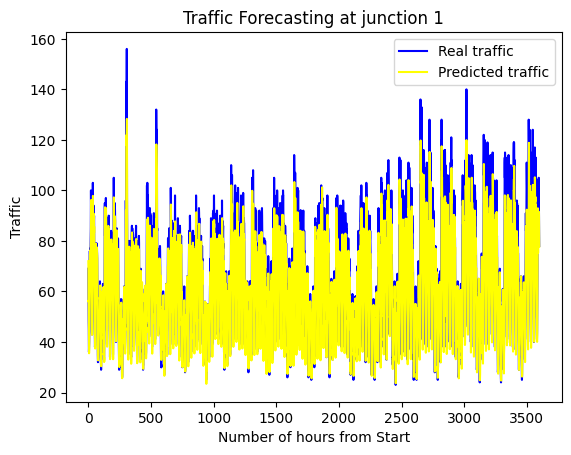

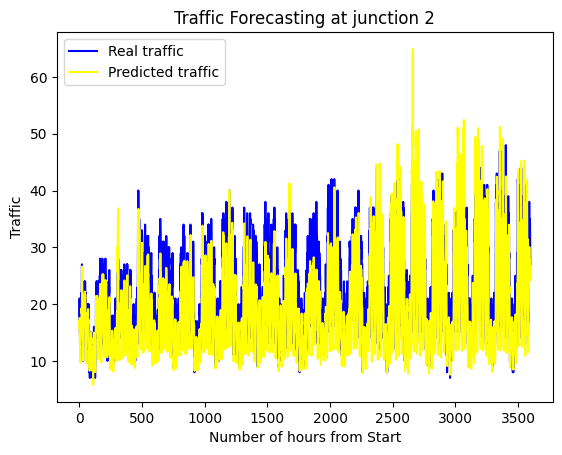

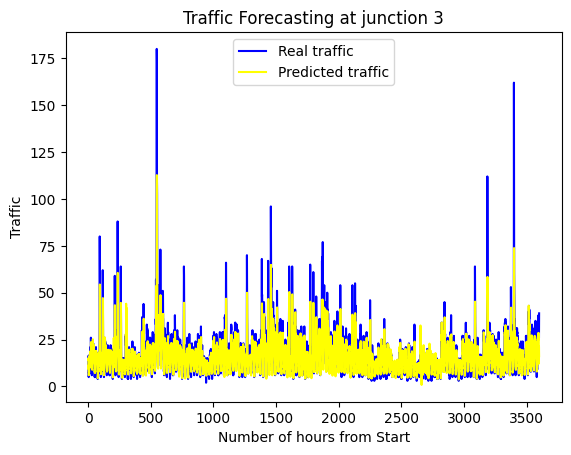

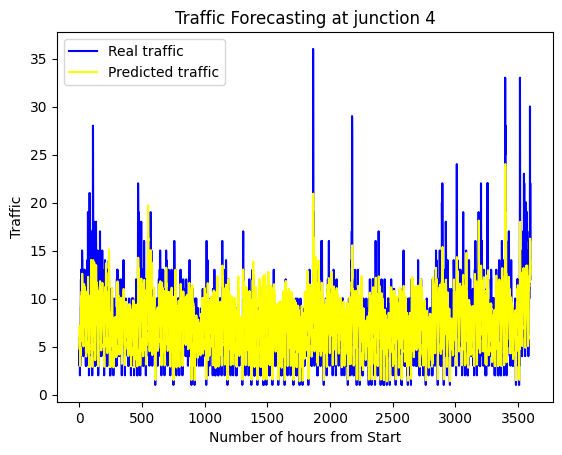

In [31]:
for junction in range(4):
    plt.figure
    plt.plot(y_test.values[:,junction],color ='blue',label='Real traffic')
    plt.plot(predictions[:,junction],color='yellow', label='Predicted traffic')
    plt.title('Traffic Forecasting at junction %i'%(junction+1))
    plt.xlabel('Number of hours from Start')
    plt.ylabel('Traffic')
    plt.legend()
    plt.show()